In [6]:
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# The load_digits() function loads a dataset of 8x8 pixel images of handwritten digits (0-9)
# Each digit is represented by a small grayscale image and its corresponding label.
digits = load_digits()

from sklearn import datasets

iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

model = LogisticRegression(max_iter=200)  # Initialize the Logistic Regression model
model.fit(X_train, y_train)  # Train the model on training data


LogisticRegression(max_iter=200)

In [21]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [22]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Model Accuracy: 1.0

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [26]:
import numpy as np

def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    features = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    prediction = model.predict(features)
    probability = model.predict_proba(features)
    return iris.target_names[prediction[0]], probability[0]

In [40]:
sample = [5.1, 3.5, 1.4, 0.2]  # Example measurements
predicted_class, probabilities = predict_iris(*sample)
print(f"\nPrediction for sample {sample}:")
print(f"Predicted class: {predicted_class}")
print("Probabilities for each class:")
for class_name, prob in zip(iris.target_names, probabilities):
    print(f"{class_name}: {prob:.3f}")

model_accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", model_accuracy)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())



Prediction for sample [5.1, 3.5, 1.4, 0.2]:
Predicted class: setosa
Probabilities for each class:
setosa: 0.977
versicolor: 0.023
virginica: 0.000
Model Accuracy: 1.0
Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation accuracy: 0.9733333333333334


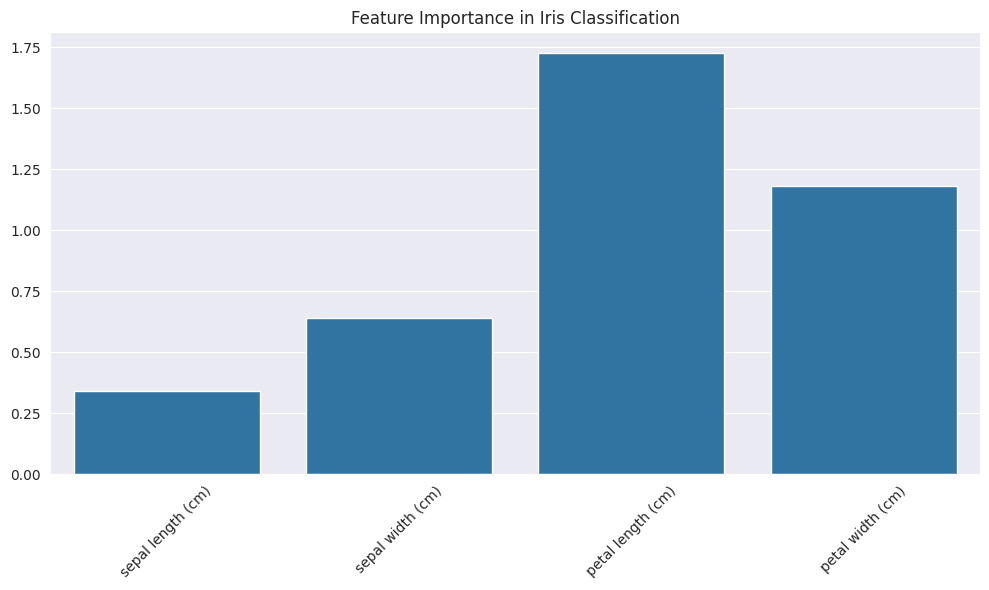

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
feature_importance = abs(model.coef_).mean(axis=0)
feature_names = iris.feature_names
sns.barplot(x=feature_names, y=feature_importance)
plt.title('Feature Importance in Iris Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()